### Exploratory data analyis of dividend capture strategy
for the S&P 500, starting in 2010

by Flor Lozano-Byrne

In [5]:
import pandas as pd
import dill
from datetime import datetime, timedelta,date
from collections import defaultdict

In [7]:
d = dill.load(open('data/d_all_EOD.pkd', 'rb'))
for ticker in d.keys():
    d[ticker] = d[ticker].reset_index(drop = True)
    

### Find stocks that currently pay dividends

In [14]:
divs = []
for ticker in d.keys():
    df = d[ticker].copy(deep=True)
    df = df[df.date > datetime(2022,11,1)]
    if [x for x in df['divCash'].values if x>0]:
        divs.append(ticker)
print(len(divs))
divs

397


['BALL',
 'BBWI',
 'TECH',
 'BX',
 'BRO',
 'BG',
 'CPT',
 'COR',
 'CTRA',
 'ELV',
 'EQT',
 'EG',
 'FDS',
 'GEN',
 'HUBB',
 'INVH',
 'KDP',
 'MPWR',
 'NDSN',
 'NXPI',
 'PARA',
 'RVTY',
 'STLD',
 'TRGP',
 'VTRS',
 'VICI',
 'WTW',
 'SPY',
 'ABT',
 'ABBV',
 'ACN',
 'AES',
 'AFL',
 'A',
 'APD',
 'ALB',
 'ARE',
 'ALLE',
 'LNT',
 'ALL',
 'MO',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'ADM',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADP',
 'AVB',
 'AVY',
 'BKR',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BBY',
 'BLK',
 'BWA',
 'BXP',
 'BMY',
 'AVGO',
 'BR',
 'CHRW',
 'CPB',
 'COF',
 'CAH',
 'CARR',
 'CAT',
 'CBOE',
 'CDW',
 'CE',
 'CNP',
 'CF',
 'SCHW',
 'CVX',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'COO',
 'GLW',
 'CTVA',
 'COST',
 'CCI',
 'CSX',
 'CMI',
 'CVS',
 'DHI',
 'DHR',
 'DRI',
 'DE',
 '

### Case 1: Maximum Gain
Total gains in the last 13 years, buying at the low the day before the ex-dividend and selling at the high the day after the ex-dividend

In [15]:
def record_gains(startdate = datetime(2010,1,1), max_gain = True):
    dicts = []
    for ticker in divs:
        gain_ct = 0
        loss_ct = 0
        gain_tot = 0
        loss_tot = 0
        net = 0
        df = d[ticker]
        df = df[df.date > startdate]
        df1 = df[df['divCash']>0]
        for index, row in df1.iterrows():
            df2 = df.loc[index - 1:index + 1]
            if len(df2) != 3:
                print('incorrect dataframe length: {} for ticker {}'.format(len(df2),ticker))
                continue
            if max_gain:
                change = df2.high.values[2] - df2.low.values[0]
            else:
                highs = df2.high.values
                lows = df2.low.values
                change = (highs[2] - highs[0] - lows[2] + lows[0])/2
            div = df2.divCash.values[1]
            gain = change + div
            if gain > 0:
                gain_ct +=1
                gain_tot += gain
            else:
                loss_ct +=1
                loss_tot += gain
            net += gain
        dicts.append({'ticker':ticker
                  , 'gain_ct': gain_ct
                 , 'gain_tot': gain_tot
                 , 'loss_ct': loss_ct
                 , 'loss_tot': loss_tot
                 , 'net': net})
    return pd.DataFrame(dicts).sort_values('net').reset_index(drop=True)
max_gains = record_gains()
max_gains

incorrect dataframe length: 2 for ticker AMP
incorrect dataframe length: 2 for ticker BKR
incorrect dataframe length: 2 for ticker BKR
incorrect dataframe length: 2 for ticker C
incorrect dataframe length: 2 for ticker CMCSA
incorrect dataframe length: 2 for ticker ETN
incorrect dataframe length: 2 for ticker GL
incorrect dataframe length: 2 for ticker JPM
incorrect dataframe length: 2 for ticker KHC


,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
0,KVUE,1,0.26000,0,0.0000,0.26000
1,VTRS,8,1.70250,2,-0.4750,1.22750
2,LH,4,6.25000,2,-4.2500,2.00000
3,GEHC,3,2.66330,0,0.0000,2.66330
4,T,8,3.65440,4,-0.4885,3.16590
...,...,...,...,...,...,...
392,MA,49,355.40710,7,-5.8950,349.51210
393,GWW,50,408.27600,5,-19.1740,389.10200
394,EQIX,34,424.98684,3,-29.1811,395.80574
395,LRCX,33,469.69790,5,-32.8225,436.87540


In [6]:
max_gains[max_gains.gain_ct<max_gains.loss_ct]


,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net


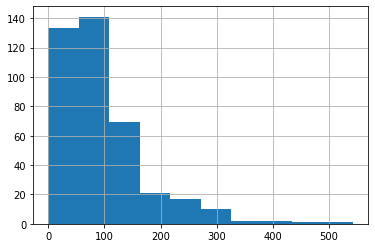

In [7]:
max_gains.net.hist()

### Case 2: Maximum Gain in the last year

In [6]:
STARTDATE = datetime(2022,10,26)

In [50]:
latest_max_gains = record_gains(startdate = STARTDATE)
latest_max_gains

incorrect dataframe length: 2 for ticker AMP
incorrect dataframe length: 2 for ticker BKR
incorrect dataframe length: 2 for ticker CARR
incorrect dataframe length: 2 for ticker C
incorrect dataframe length: 2 for ticker COST
incorrect dataframe length: 2 for ticker ETN


,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
0,UHS,3,9.8150,1,-12.3500,-2.5350
1,ES,1,0.1350,3,-1.6900,-1.5550
2,WYNN,1,0.5800,1,-1.5400,-0.9600
3,DVN,2,0.5182,2,-1.0751,-0.5569
4,FRT,2,3.1600,2,-3.6850,-0.5250
...,...,...,...,...,...,...
392,KLAC,4,68.8300,0,0.0000,68.8300
393,POOL,4,73.8100,0,0.0000,73.8100
394,INTU,4,90.0600,0,0.0000,90.0600
395,MPWR,4,99.7750,0,0.0000,99.7750


In [51]:
### Companies that lost using this strategy in the last year
latest_max_gains[latest_max_gains.net < 0]

,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
0,UHS,3,9.8150,1,-12.3500,-2.5350
1,ES,1,0.1350,3,-1.6900,-1.5550
2,WYNN,1,0.5800,1,-1.5400,-0.9600
3,DVN,2,0.5182,2,-1.0751,-0.5569
4,FRT,2,3.1600,2,-3.6850,-0.5250


In [52]:
### How the losing companies last years did over the last 13 years
max_gains[max_gains.ticker.isin(latest_max_gains[latest_max_gains.net < 0].ticker.values)]

,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
134,DVN,45,64.6984,12,-9.14010,55.55830
146,ES,48,63.2445,10,-4.62875,58.61575
254,FRT,47,121.9724,9,-20.53510,101.43730
319,UHS,49,149.3199,4,-14.40000,134.91990
321,WYNN,35,152.0353,8,-14.70950,137.32580


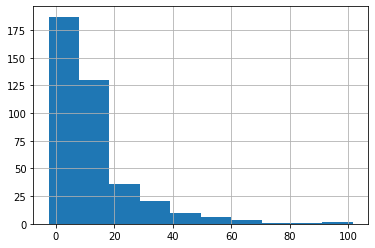

In [53]:
### Distributiion of net gains
latest_max_gains.net.hist()

### Case 3: Average Gain
Total gains in the last 13 years, assuming buys at the midpoint between high and low the day before the ex-dividend and selling at the midpoint between high and low the day after the ex-dividend

In [54]:
avg_gains = record_gains(max_gain = False)
avg_gains

incorrect dataframe length: 2 for ticker AMP
incorrect dataframe length: 2 for ticker BKR
incorrect dataframe length: 2 for ticker BKR
incorrect dataframe length: 2 for ticker C
incorrect dataframe length: 2 for ticker CMCSA
incorrect dataframe length: 2 for ticker ETN
incorrect dataframe length: 2 for ticker GL
incorrect dataframe length: 2 for ticker JPM
incorrect dataframe length: 2 for ticker KHC


,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
0,MPWR,18,9.67330,21,-25.41290,-15.73960
1,POOL,37,25.87620,18,-41.12025,-15.24405
2,NVDA,6,5.60345,6,-16.37205,-10.76860
3,GE,6,1.68090,6,-1.98310,-0.30220
4,CEG,4,1.35350,3,-1.56950,-0.21600
...,...,...,...,...,...,...
392,PSA,55,101.29950,1,-2.69750,98.60200
393,EQIX,32,112.34044,5,-9.77780,102.56264
394,KDP,50,122.21950,5,-0.72750,121.49200
395,LMT,55,123.71545,0,0.00000,123.71545


In [55]:
avg_gains[avg_gains.net < 0]

,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
0,MPWR,18,9.67330,21,-25.41290,-15.73960
1,POOL,37,25.87620,18,-41.12025,-15.24405
2,NVDA,6,5.60345,6,-16.37205,-10.76860
3,GE,6,1.68090,6,-1.98310,-0.30220
4,CEG,4,1.35350,3,-1.56950,-0.21600
5,PAYC,1,0.95500,1,-1.15510,-0.20010


In [56]:
max_gains[max_gains.ticker.isin(avg_gains[avg_gains.net < 0].ticker.values)]

,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
30,PAYC,2,17.2298,0,0.0000,17.2298
32,CEG,6,19.1490,1,-0.4885,18.6605
61,GE,11,29.1306,1,-0.6400,28.4906
312,NVDA,11,145.3096,1,-15.1200,130.1896
382,MPWR,37,279.4469,2,-1.0400,278.4069
390,POOL,52,328.1517,3,-3.9550,324.1967


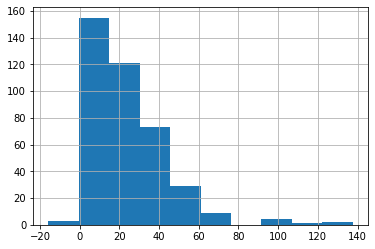

In [57]:
avg_gains.net.hist()

### Case 4: Average gain in the last year

In [58]:
latest_avg_gains = record_gains(startdate = STARTDATE, max_gain=False)
latest_avg_gains

incorrect dataframe length: 2 for ticker AMP
incorrect dataframe length: 2 for ticker BKR
incorrect dataframe length: 2 for ticker CARR
incorrect dataframe length: 2 for ticker C
incorrect dataframe length: 2 for ticker COST
incorrect dataframe length: 2 for ticker ETN


,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
0,AON,2,1.670000,3,-16.90440,-15.234400
1,CMA,1,0.042500,3,-7.97000,-7.927500
2,MPWR,0,0.000000,4,-5.77750,-5.777500
3,ALB,1,1.249950,3,-6.50360,-5.253650
4,PH,1,1.035000,3,-3.80640,-2.771400
...,...,...,...,...,...,...
392,PXD,4,19.340500,0,0.00000,19.340500
393,NDSN,3,21.417600,1,-1.04995,20.367650
394,BLK,4,24.828450,0,0.00000,24.828450
395,AVGO,4,26.530050,0,0.00000,26.530050


In [59]:
latest_avg_gains[latest_avg_gains.net < 0]

,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
0,AON,2,1.670000,3,-16.904400,-15.23440
1,CMA,1,0.042500,3,-7.970000,-7.92750
2,MPWR,0,0.000000,4,-5.777500,-5.77750
3,ALB,1,1.249950,3,-6.503600,-5.25365
4,PH,1,1.035000,3,-3.806400,-2.77140
5,COO,0,0.000000,2,-2.471250,-2.47125
6,SPGI,1,0.060000,3,-2.235000,-2.17500
7,CF,1,1.005000,3,-2.622500,-1.61750
8,AMP,2,1.700000,2,-3.270000,-1.57000
9,EFX,2,0.802500,2,-2.297500,-1.49500


In [60]:
max_gains[max_gains.ticker.isin(latest_avg_gains[latest_avg_gains.net < 0].ticker.values)]

,ticker,gain_ct,gain_tot,loss_ct,loss_tot,net
30,PAYC,2,17.229800,0,0.000000,17.229800
33,APH,11,19.885000,2,-0.605000,19.280000
52,MGM,20,27.651600,4,-2.150000,25.501600
61,GE,11,29.130600,1,-0.640000,28.490600
85,HRL,53,40.905000,3,-0.882500,40.022500
87,DAL,28,40.513500,1,-0.287500,40.226000
128,XRAY,49,55.339900,6,-1.670000,53.669900
164,XYL,40,71.770000,8,-6.060600,65.709400
167,STLD,51,68.574700,4,-1.465200,67.109500
188,PGR,31,74.625600,1,-0.260000,74.365600


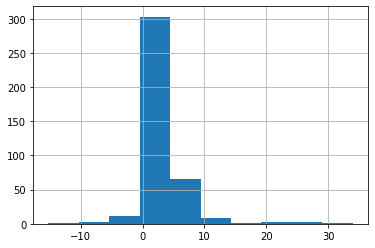

In [61]:
latest_avg_gains.net.hist()

### Portfolio Analysis
Comparing holding SPY ETF vs switching to capture dividends for 3 days and switching back to SPY

In [8]:
d['SPY'][d['SPY'].date > STARTDATE]

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
3227,2022-10-27,379.98,385.000,379.3300,383.07,81971756,374.031927,378.973346,373.392102,377.073558,81971756,0.0,1.0
3228,2022-10-28,389.02,389.520,379.6800,379.87,100301958,382.930418,383.422592,373.736623,373.923649,100301958,0.0,1.0
3229,2022-10-31,386.21,388.400,385.2600,386.44,96631258,380.164405,382.320124,379.229276,380.390805,96631258,0.0,1.0
3230,2022-11-01,384.52,390.390,383.2900,390.14,85407598,378.500860,384.278973,377.290114,384.032886,85407598,0.0,1.0
3231,2022-11-02,374.87,388.630,374.7600,383.90,126990356,369.001917,382.546523,368.893639,377.890565,126990356,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,2023-10-30,415.59,416.680,412.2200,413.56,86562675,415.590000,416.680000,412.220000,413.560000,86562675,0.0,1.0
3480,2023-10-31,418.20,418.530,414.2100,416.18,79665150,418.200000,418.530000,414.210000,416.180000,79665150,0.0,1.0
3481,2023-11-01,422.66,423.500,418.6499,419.20,98068115,422.660000,423.500000,418.649900,419.200000,98068115,0.0,1.0
3482,2023-11-02,430.76,430.915,426.5600,426.58,94938909,430.760000,430.915000,426.560000,426.580000,94938909,0.0,1.0


In [9]:
### Holding SPY, buying at the close, final value at the close
def calc_spy():
    n_shares = 100
    df = d['SPY'][d['SPY'].date > STARTDATE]
    entry = n_shares * df.iloc[0].adjClose
    print('Original Investment: {}'.format(entry))
    exit = n_shares * df.iloc[-1].adjClose
    profit = exit - entry
    print('Profit: {}%'.format(profit/entry*100))
    return entry
orig_invest = calc_spy()

Original Investment: 37403.19273072
Profit: 16.21735158533145%


In [10]:
def create_dc_sched(startdate, max_gain):
    dicts = []
    df_divs = pd.DataFrame()
    for ticker in divs:
        gain_tot = 0
        loss_tot = 0
        net = 0
        df = d[ticker]
        df = df[df.date > startdate]
        df1 = df[df['divCash']>0]
        df1['ticker'] = ticker
        df_divs =df_divs.append(df1)
    return df_divs.sort_values('date')
        
df_divs = create_dc_sched(STARTDATE, True)

NameError: name 'divs' is not defined

In [11]:
df_divs.to_csv('dividends.csv')

### Run trading simulations of past year trades

In [11]:
df_divs = pd.read_csv('data/dividends.csv')

In [12]:
### Too many each day, need to choose
df_divs

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,ticker
0,658,2022-10-27,37.88,38.5900,37.530,38.05,7529894,37.252137,37.950369,36.907938,37.419319,7529894,0.150,1.0,CARR
1,3227,2022-10-27,496.54,503.0100,494.140,499.81,1576567,492.807491,499.228856,490.425532,496.052910,1576567,0.900,1.0,COST
2,3228,2022-10-28,54.38,54.4850,51.920,51.96,1063284,53.179051,53.281732,50.773379,50.812495,1063284,0.300,1.0,AOS
3,3228,2022-10-28,82.22,82.2950,79.510,80.27,7816061,79.167709,79.239925,76.558314,77.290100,7816061,0.775,1.0,MS
4,3228,2022-10-28,96.10,96.3750,93.660,94.49,858656,93.809202,94.077647,91.427366,92.237581,858656,0.700,1.0,CE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,3482,2023-11-02,555.97,559.5100,552.010,556.50,2100573,555.970000,559.510000,552.010000,556.500000,2100573,1.020,1.0,COST
1612,1595,2023-11-03,35.19,35.5400,34.945,35.53,5519138,35.190000,35.540000,34.945000,35.530000,5519138,0.200,1.0,BKR
1613,3483,2023-11-03,335.74,340.2600,334.250,334.29,708067,335.740000,340.260000,334.250000,334.290000,708067,1.350,1.0,AMP
1614,3483,2023-11-03,214.79,219.5399,214.715,218.71,1852921,214.790000,219.539900,214.715000,218.710000,1852921,0.860,1.0,ETN


#### 1. Using ideal entry and exit prices (high -low)

In [31]:
### For each day, choose the ticker with the highest historical gains
def trades(start_amount, max_gain=True):
    curr_val = start_amount
    avail_amts = [curr_val / 3] * 3
    total = 0
    curr_avail_index = 0
    d_trades = defaultdict(list)
    d_trade_dates = {}
    for date in df_divs.date.unique():
        if curr_avail_index > 2:
            curr_avail_index = 0
        df1 = df_divs[df_divs.date == date]
        tickers = df1.ticker.values
        d_indexes ={}
        for ticker in tickers:
            d_indexes[ticker] = max_gains[max_gains.ticker == ticker].index[0]    
        selected_ticker = sorted([x for x in d_indexes.items()], key=lambda x:x[1], reverse=True)[0][0]
        df2 = d[selected_ticker]
        idx = df2[df2.date == date].index[0]
        df2 = df2.loc[idx - 1:idx + 1]
        if len(df2) == 3:
            d_trades[selected_ticker].append(date)
            d_trade_dates[date] = selected_ticker
            if max_gain:
                entry_price = df2.low.values[0]
                gain = df2.high.values[2] - entry_price + df2.divCash.values[1]
            else:
                highs = df2.high.values
                lows = df2.low.values
                entry_price = (highs[0] + lows[0]) / 2
                gain = (highs[2] + lows[2]) / 2 - entry_price + df2.divCash.values[1]
            n_shares = avail_amts[curr_avail_index] // entry_price
            gain *= n_shares
            avail_amts[curr_avail_index] += gain
            total += gain
            #print('Number of shares: {}, Gain {}'.format(n_shares,gain))
            #print(avail_amts, sum(avail_amts))
            curr_avail_index += 1
    print('Total gains: {}'.format(total))
    print('Percent return: {}%'.format(total/start_amount * 100))
    if max_gain:
        dill.dump(d_trades,open('data/d_trades.pkd','wb'))
        dill.dump(d_trade_dates,open('data/d_trade_dates.pkd','wb'))
    return d_trades

d_trades = trades(orig_invest)

Total gains: 189254.33683600012
Percent return: 505.98444415832364%


In [19]:
orig_invest

37403.19273072

In [20]:
trades(orig_invest, max_gain = False)

Total gains: 3071.7541369999844
Percent return: 8.212545274182142%


defaultdict(list,
            {'COST': ['2022-10-27',
              '2023-02-02',
              '2023-05-04',
              '2023-08-24',
              '2023-11-02'],
             'CE': ['2022-10-28', '2023-07-28', '2023-10-27'],
             'AON': ['2022-10-31',
              '2023-01-31',
              '2023-04-28',
              '2023-07-31',
              '2023-10-31'],
             'MKTX': ['2022-11-01', '2023-02-07', '2023-05-09', '2023-08-01'],
             'CAG': ['2022-11-02', '2023-11-01'],
             'NSC': ['2022-11-03', '2023-08-03'],
             'AMP': ['2022-11-04', '2023-02-09', '2023-08-04'],
             'AWK': ['2022-11-07', '2023-02-06', '2023-05-08', '2023-08-07'],
             'WST': ['2022-11-08', '2023-01-24', '2023-04-25', '2023-07-25'],
             'POOL': ['2022-11-09', '2023-05-16', '2023-08-09'],
             'GWW': ['2022-11-10', '2023-02-10', '2023-05-05', '2023-08-11'],
             'TFX': ['2022-11-14', '2023-03-02', '2023-08-14'],
             'EQ

In [35]:
d_trade_dates = dill.load(open('data/d_trade_dates.pkd','rb'))
d_trade_dates

{'2022-10-27': 'COST',
 '2022-10-28': 'CE',
 '2022-10-31': 'AON',
 '2022-11-01': 'MKTX',
 '2022-11-02': 'CAG',
 '2022-11-03': 'NSC',
 '2022-11-04': 'AMP',
 '2022-11-07': 'AWK',
 '2022-11-08': 'WST',
 '2022-11-09': 'POOL',
 '2022-11-10': 'GWW',
 '2022-11-14': 'TFX',
 '2022-11-15': 'EQIX',
 '2022-11-16': 'AMGN',
 '2022-11-17': 'WHR',
 '2022-11-18': 'TSCO',
 '2022-11-21': 'SWKS',
 '2022-11-22': 'EG',
 '2022-11-23': 'HII',
 '2022-11-25': 'NOC',
 '2022-11-28': 'KEY',
 '2022-11-29': 'FDS',
 '2022-11-30': 'GS',
 '2022-12-01': 'TT',
 '2022-12-02': 'UNH',
 '2022-12-05': 'CI',
 '2022-12-06': 'BLK',
 '2022-12-07': 'NEM',
 '2022-12-08': 'CME',
 '2022-12-09': 'FDX',
 '2022-12-12': 'BBY',
 '2022-12-13': 'LRCX',
 '2022-12-14': 'TMO',
 '2022-12-15': 'CB',
 '2022-12-16': 'UNP',
 '2022-12-19': 'AVGO',
 '2022-12-20': 'STX',
 '2022-12-21': 'PM',
 '2022-12-23': 'COP',
 '2022-12-27': 'CME',
 '2022-12-28': 'XEL',
 '2022-12-29': 'HUM',
 '2022-12-30': 'ESS',
 '2023-01-03': 'CMCSA',
 '2023-01-04': 'CPB',
 '2023

### 2. Using ARIMA predicted prices

In [23]:
N_PRIOR_DAYS = 251

In [25]:
### create arima datasets

def adjust_splits(df):
    df = df.reset_index(drop = True)
    splits = [(datetime.strptime(str(x[0])[:10],'%Y-%m-%d'),x[1]) for x in df[df.splitFactor != 1][['date','splitFactor']].to_records(index=False)]
    df = df[['date','close','high','low']].set_index('date')
    for date, factor in splits:
        df.loc[df.index < date] = df.loc[df.index < date] / factor
    return df

d_dfs = defaultdict(dict)
for ticker, dates in d_trades.items():
    df = adjust_splits(d[ticker])
    dates = [datetime.strptime(str(x),'%Y-%m-%d') for x in dates]
    for date in dates:
        df1 = df.loc[df.index <= date][-N_PRIOR_DAYS:]
        if len(df1) >= N_PRIOR_DAYS:
            d_dfs[ticker][date] = df1
dill.dump(d_dfs,open('data/d_dfs.pkd','wb'))

In [29]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

def get_model_predict():
    d_predictions = defaultdict(dict)
    for ticker, dates in d_dfs.items():
        for date, df in dates.items():
            params_low = auto_arima(df.low).order
            params_high = auto_arima(df.high).order
            d_temp_models = {}
            d_temp_predict = {}
            d_temp_models['low'] = ARIMA(df['low'].values[:-2], order=params_low).fit()
            d_temp_models['high'] = ARIMA(df['high'].values, order=params_high).fit()
            
            d_temp_predict['low'] = d_temp_models['low'].predict(start=len(df)-2,end=len(df)-2)[0]
            d_temp_predict['high'] = d_temp_models['high'].predict(start=len(df),end=len(df))[0]
            
            d_predictions[ticker][date] = d_temp_predict
            print(ticker,date)
            print(params_low,params_high)
            print(df.tail(3))
            print(d_temp_predict)
            dill.dump(d_predictions,open('data/arima_predictions.pkd','wb'))
            
get_model_predict()

COST 2022-10-27 00:00:00
(2, 1, 2) (0, 1, 1)
             close    high       low
date                                
2022-10-25  499.06  500.19  490.5001
2022-10-26  499.45  507.42  495.6900
2022-10-27  496.54  503.01  494.1400
{'low': 492.8902923409651, 'high': 501.93784617563506}
COST 2023-02-02 00:00:00
(2, 1, 2) (0, 1, 1)
             close    high     low
date                              
2023-01-31  511.14  511.41  502.00
2023-02-01  517.91  520.45  504.72
2023-02-02  523.43  530.05  520.64
{'low': 501.9693338780719, 'high': 531.6549323407447}
COST 2023-05-04 00:00:00
(2, 0, 0) (1, 0, 1)
             close    high       low
date                                
2023-05-02  494.81  495.68  489.8100
2023-05-03  490.06  498.78  489.6615
2023-05-04  490.34  490.91  485.9300
{'low': 490.0556880951054, 'high': 489.86693167080387}
COST 2023-08-24 00:00:00
(0, 1, 1) (0, 1, 0)
             close    high     low
date                              
2023-08-22  538.37  541.96  537.50
2023-0

/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AON 2023-01-31 00:00:00
(0, 1, 0) (2, 1, 2)
             close     high     low
date                               
2023-01-27  319.30  324.310  317.76
2023-01-30  317.54  321.670  316.80
2023-01-31  318.68  319.415  315.01
{'low': 317.76, 'high': 318.8511761013517}
AON 2023-04-28 00:00:00
(0, 1, 0) (0, 1, 0)
             close    high       low
date                                
2023-04-26  327.36  330.05  325.5185
2023-04-27  332.86  333.04  325.8400
2023-04-28  325.18  327.79  313.7700
{'low': 325.5185, 'high': 327.79}
AON 2023-07-31 00:00:00
(0, 1, 0) (0, 1, 0)
             close     high     low
date                               
2023-07-27  337.06  342.860  336.50
2023-07-28  319.82  343.680  317.75
2023-07-31  318.50  321.305  314.26
{'low': 336.5, 'high': 321.305}
AON 2023-10-31 00:00:00
(0, 1, 0) (0, 1, 0)
             close     high     low
date                               
2023-10-27  306.88  313.035  300.41
2023-10-30  308.79  309.625  302.31
2023-10-31  309.40  310.59

/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AMP 2023-08-04 00:00:00
(2, 1, 3) (0, 1, 0)
             close     high     low
date                               
2023-08-02  347.76  349.375  345.01
2023-08-03  352.49  354.560  344.68
2023-08-04  344.86  353.570  344.53
{'low': 343.8932798731112, 'high': 353.57}
AWK 2022-11-07 00:00:00
(2, 1, 0) (1, 1, 0)
             close    high     low
date                              
2022-11-03  137.84  139.10  135.72
2022-11-04  139.04  139.64  136.77
2022-11-07  138.04  138.66  135.61
{'low': 134.84124421387298, 'high': 138.34252723533248}
AWK 2023-02-06 00:00:00
(1, 1, 0) (1, 1, 0)
             close    high      low
date                               
2023-02-02  160.60  162.59  158.030
2023-02-03  156.61  159.95  155.100
2023-02-06  156.41  156.50  154.785
{'low': 158.65309436486663, 'high': 155.54495197809527}
AWK 2023-05-08 00:00:00
(3, 0, 0) (2, 0, 1)
             close    high     low
date                              
2023-05-04  147.82  148.38  146.07
2023-05-05  148.43  148.90  1

/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


WST 2022-11-08 00:00:00
(2, 1, 1) (0, 1, 1)
             close    high     low
date                              
2022-11-04  215.59  215.79  206.99
2022-11-07  225.94  226.15  215.20
2022-11-08  224.56  232.05  222.92
{'low': 208.81245427180505, 'high': 232.95792591234738}


/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


WST 2023-01-24 00:00:00
(3, 1, 3) (2, 1, 1)
             close    high     low
date                              
2023-01-20  259.55  259.60  254.26
2023-01-23  264.11  265.51  256.95
2023-01-24  258.33  260.95  255.70
{'low': 254.90134887440195, 'high': 260.76890045726714}
WST 2023-04-25 00:00:00
(0, 2, 1) (0, 2, 3)
             close     high      low
date                                
2023-04-21  365.88  366.990  362.865
2023-04-24  371.97  372.060  366.430
2023-04-25  357.00  368.625  356.290
{'low': 364.03537287796735, 'high': 368.80990336947116}
WST 2023-07-25 00:00:00
(0, 1, 0) (0, 1, 0)
             close     high     low
date                               
2023-07-21  377.32  385.500  376.94
2023-07-24  376.06  378.770  374.08
2023-07-25  377.13  383.555  373.00
{'low': 376.94, 'high': 383.555}


/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


POOL 2022-11-09 00:00:00
(0, 1, 0) (1, 1, 1)
             close     high     low
date                               
2022-11-07  304.16  304.250  292.07
2022-11-08  307.79  312.225  302.15
2022-11-09  300.40  305.810  299.11
{'low': 292.07, 'high': 305.64341488067066}
POOL 2023-05-16 00:00:00
(0, 1, 0) (0, 1, 1)
             close     high       low
date                                 
2023-05-12  338.65  349.950  336.1341
2023-05-15  342.16  342.380  335.7200
2023-05-16  340.53  342.665  333.9300
{'low': 336.1341, 'high': 342.8298908585591}
POOL 2023-08-09 00:00:00
(0, 1, 0) (0, 1, 1)
             close    high     low
date                              
2023-08-07  386.09  387.48  382.29
2023-08-08  386.27  386.35  377.86
2023-08-09  384.20  387.10  381.13
{'low': 382.29, 'high': 387.2296353157683}
GWW 2022-11-10 00:00:00
(1, 1, 3) (0, 1, 1)
             close    high      low
date                               
2022-11-08  600.66  606.12  593.375
2022-11-09  591.01  604.90  590.730


/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


TSCO 2022-11-18 00:00:00
(2, 1, 1) (0, 1, 0)
             close    high     low
date                              
2022-11-16  219.10  220.54  209.56
2022-11-17  214.88  217.99  211.15
2022-11-18  219.86  220.41  215.60
{'low': 208.68680552199342, 'high': 220.41}
SWKS 2022-11-21 00:00:00
(0, 1, 0) (0, 1, 1)
            close   high    low
date                           
2022-11-17  93.75  94.09  90.35
2022-11-18  94.33  95.19  92.98
2022-11-21  92.08  93.30  91.96
{'low': 90.35, 'high': 93.06732649299923}
SWKS 2023-08-28 00:00:00
(0, 1, 0) (0, 1, 0)
             close    high     low
date                              
2023-08-24  104.23  108.46  103.84
2023-08-25  105.39  105.96  103.48
2023-08-28  106.20  106.38  105.02
{'low': 103.84, 'high': 106.38}
EG 2022-11-22 00:00:00
(1, 0, 0) (2, 0, 0)
             close    high     low
date                              
2022-11-18  323.49  325.98  318.14
2022-11-21  324.05  325.38  320.03
2022-11-22  327.25  327.47  322.38
{'low': 316.4622167

/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


NOC 2023-02-24 00:00:00
(2, 1, 2) (0, 1, 1)
             close    high      low
date                               
2023-02-22  478.73  481.50  473.950
2023-02-23  476.26  482.34  472.705
2023-02-24  470.91  478.00  468.550
{'low': 474.15646232622447, 'high': 477.37053358880746}
NOC 2023-05-26 00:00:00
(0, 1, 0) (0, 1, 0)
             close    high     low
date                              
2023-05-24  441.44  446.35  441.38
2023-05-25  433.51  439.95  429.10
2023-05-26  438.32  441.51  432.62
{'low': 441.38, 'high': 441.51}


/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


NOC 2023-08-25 00:00:00
(0, 1, 0) (2, 1, 2)
             close    high     low
date                              
2023-08-23  434.52  440.01  433.37
2023-08-24  432.18  437.69  432.12
2023-08-25  429.56  433.25  428.50
{'low': 433.37, 'high': 433.5424911656777}
KEY 2022-11-28 00:00:00
(2, 1, 2) (0, 1, 0)
            close    high     low
date                             
2022-11-23  18.92  19.020  18.830
2022-11-25  19.03  19.085  18.980
2022-11-28  18.33  18.740  18.245
{'low': 18.8249765842501, 'high': 18.74}
FDS 2022-11-29 00:00:00
(1, 1, 0) (1, 1, 0)
             close     high     low
date                               
2022-11-25  455.58  455.675  452.47
2022-11-28  452.35  457.180  450.39
2022-11-29  449.12  455.770  445.90
{'low': 452.94764167481935, 'high': 455.5327761232339}
FDS 2023-02-27 00:00:00
(0, 1, 1) (0, 1, 1)
             close     high      low
date                                
2023-02-23  426.48  427.285  421.190
2023-02-24  421.39  422.550  417.700
2023-02-27  

/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


GS 2022-11-30 00:00:00
(2, 1, 3) (0, 1, 1)
             close    high     low
date                              
2022-11-28  382.36  388.39  380.89
2022-11-29  383.71  384.93  379.26
2022-11-30  386.15  386.15  375.10
{'low': 381.7566778495636, 'high': 386.4423109473558}
GS 2023-03-01 00:00:00
(1, 1, 0) (0, 1, 1)
             close    high      low
date                               
2023-02-27  365.53  370.30  364.505
2023-02-28  351.65  366.01  351.330
2023-03-01  346.23  352.54  345.960
{'low': 365.359346874501, 'high': 350.43510130223706}
GS 2023-05-31 00:00:00
(1, 1, 0) (1, 1, 0)
             close    high      low
date                               
2023-05-26  332.01  332.87  324.000
2023-05-30  330.83  332.53  327.725
2023-05-31  323.90  327.25  321.815
{'low': 324.92071790325565, 'high': 326.4416716592709}
TT 2022-12-01 00:00:00
(0, 2, 2) (0, 2, 2)
             close     high     low
date                               
2022-11-29  174.99  175.955  173.66
2022-11-30  178.42  17

/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


BLK 2023-03-06 00:00:00
(2, 1, 2) (0, 1, 0)
             close    high     low
date                              
2023-03-02  685.91  687.40  672.76
2023-03-03  695.24  695.34  688.06
2023-03-06  688.39  698.79  687.56
{'low': 672.549891434437, 'high': 698.79}
BLK 2023-06-07 00:00:00
(0, 1, 0) (0, 1, 0)
             close      high       low
date                                  
2023-06-05  676.49  682.9600  674.2200
2023-06-06  684.92  685.6149  673.3400
2023-06-07  678.23  680.0300  670.1924
{'low': 674.22, 'high': 680.03}
BLK 2023-09-07 00:00:00
(0, 1, 0) (0, 1, 0)
             close    high       low
date                                
2023-09-05  695.93  708.29  695.4900
2023-09-06  694.18  699.32  688.6975
2023-09-07  691.06  692.65  679.9500
{'low': 695.49, 'high': 692.65}
NEM 2022-12-07 00:00:00
(0, 1, 0) (0, 1, 0)
            close   high      low
date                             
2022-12-05  47.47  48.69  47.1631
2022-12-06  47.12  48.40  46.8000
2022-12-07  47.19  47.68  4

COP 2023-02-13 00:00:00
(0, 1, 0) (0, 1, 1)
             close      high     low
date                                
2023-02-09  109.93  111.7400  109.85
2023-02-10  115.06  115.3673  111.83
2023-02-13  112.31  114.0950  112.12
{'low': 109.85, 'high': 113.7774670626963}
COP 2023-03-28 00:00:00
(0, 1, 0) (0, 1, 1)
            close   high     low
date                            
2023-03-24  95.43  95.90  93.260
2023-03-27  97.48  98.50  95.595
2023-03-28  97.93  98.69  96.430
{'low': 93.26, 'high': 98.63235939048293}
COP 2023-05-15 00:00:00
(0, 1, 1) (0, 1, 1)
             close    high     low
date                              
2023-05-11   99.89  100.12  98.550
2023-05-12   99.43  100.95  98.705
2023-05-15  100.29  100.45  98.460
{'low': 98.42274146905137, 'high': 100.35386253663255}
COP 2023-06-26 00:00:00
(0, 1, 0) (0, 1, 0)
             close    high     low
date                              
2023-06-22  101.43  102.88  101.10
2023-06-23  100.46  100.92   99.63
2023-06-26  101.31 

/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


CMCSA 2023-01-03 00:00:00
(2, 1, 2) (0, 1, 0)
            close    high    low
date                            
2022-12-29  35.05  35.350  34.70
2022-12-30  34.97  34.975  34.53
2023-01-03  35.57  35.590  34.74
{'low': 34.72007990896198, 'high': 35.59}
CMCSA 2023-10-03 00:00:00
(2, 1, 5) (2, 1, 1)
            close   high    low
date                           
2023-09-29  44.34  45.09  43.99
2023-10-02  44.49  44.72  44.09
2023-10-03  43.45  44.13  43.31
{'low': 43.935380339125366, 'high': 44.11935121738689}
CPB 2023-01-04 00:00:00
(0, 1, 0) (2, 1, 2)
            close    high     low
date                             
2022-12-30  56.75  57.060  56.360
2023-01-03  56.20  56.675  55.605
2023-01-04  55.76  56.270  55.370
{'low': 56.36, 'high': 56.265744303478975}


/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


JPM 2023-01-05 00:00:00
(3, 1, 2) (0, 1, 0)
             close    high       low
date                                
2023-01-03  135.12  136.74  133.8900
2023-01-04  136.38  137.68  135.5700
2023-01-05  135.35  135.71  133.7004
{'low': 134.0316023981487, 'high': 135.71}
JPM 2023-07-05 00:00:00
(0, 1, 0) (0, 1, 0)
             close    high     low
date                              
2023-06-30  145.44  146.00  143.66
2023-07-03  146.61  147.48  146.00
2023-07-05  144.64  145.43  144.36
{'low': 143.66, 'high': 145.43}


/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MA 2023-01-06 00:00:00
(2, 1, 2) (1, 1, 0)
             close    high     low
date                              
2023-01-04  355.15  356.98  349.69
2023-01-05  351.77  357.56  351.27
2023-01-06  367.67  368.72  355.32
{'low': 348.7697384559577, 'high': 370.18248030530754}


/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


MA 2023-04-05 00:00:00
(0, 1, 1) (2, 1, 2)
             close    high     low
date                              
2023-04-03  366.47  366.66  361.75
2023-04-04  363.90  369.12  363.38
2023-04-05  363.79  365.13  361.61
{'low': 361.919435821456, 'high': 365.3630933959877}
MA 2023-07-06 00:00:00
(2, 1, 2) (0, 1, 0)
             close     high       low
date                                 
2023-07-03  393.96  394.305  388.6800
2023-07-05  394.73  395.250  387.1300
2023-07-06  393.14  394.210  389.7399
{'low': 387.9051576510781, 'high': 394.21}
MA 2023-10-05 00:00:00
(0, 1, 0) (0, 1, 0)
             close    high     low
date                              
2023-10-03  391.06  397.86  388.97
2023-10-04  393.76  394.47  388.58
2023-10-05  394.20  394.72  390.00
{'low': 388.97, 'high': 394.72}
INTU 2023-01-09 00:00:00
(0, 1, 1) (0, 1, 1)
             close    high     low
date                              
2023-01-05  375.62  387.47  375.00
2023-01-06  386.52  389.34  370.62
2023-01-09  395.34

CF 2023-02-14 00:00:00
(1, 0, 0) (1, 0, 0)
            close    high     low
date                             
2023-02-10  90.49  91.230  86.980
2023-02-13  86.85  89.610  86.670
2023-02-14  85.53  86.215  84.395
{'low': 87.13041350675138, 'high': 86.47060326351921}
MPC 2023-02-15 00:00:00
(1, 1, 0) (0, 1, 1)
             close     high     low
date                               
2023-02-13  127.81  127.860  125.14
2023-02-14  128.64  129.355  126.55
2023-02-15  127.11  127.420  125.27
{'low': 125.50962213950507, 'high': 126.86957739630977}
MSCI 2023-02-16 00:00:00
(0, 1, 1) (0, 1, 0)
             close    high       low
date                                
2023-02-14  561.82  570.43  557.0600
2023-02-15  567.06  567.07  553.6251
2023-02-16  552.99  560.77  551.7600
{'low': 558.7491820193129, 'high': 560.77}
MSCI 2023-05-11 00:00:00
(0, 1, 1) (0, 1, 0)
             close      high      low
date                                 
2023-05-09  472.87  476.2799  468.790
2023-05-10  476.07  4

/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


EFX 2023-05-24 00:00:00
(2, 1, 2) (0, 1, 0)
             close     high      low
date                                
2023-05-22  215.31  216.780  208.940
2023-05-23  210.06  214.425  209.200
2023-05-24  207.74  208.650  207.145
{'low': 208.8646222146806, 'high': 208.65}


/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SNA 2023-02-22 00:00:00
(3, 1, 2) (0, 1, 1)
             close    high     low
date                              
2023-02-17  252.28  254.16  251.20
2023-02-21  246.01  251.86  246.00
2023-02-22  244.25  246.79  243.84
{'low': 251.02215585434726, 'high': 245.87805327114978}
SPGI 2023-02-23 00:00:00
(0, 1, 0) (0, 1, 0)
             close     high      low
date                                
2023-02-21  350.79  357.055  350.425
2023-02-22  346.20  352.320  344.470
2023-02-23  348.13  350.670  344.590
{'low': 350.425, 'high': 350.67}
SPGI 2023-05-25 00:00:00
(1, 0, 1) (1, 0, 1)
             close    high     low
date                              
2023-05-23  362.19  372.45  360.88
2023-05-24  356.20  362.38  354.20
2023-05-25  358.32  359.45  354.74
{'low': 359.6317091936156, 'high': 358.8682632379979}
LMT 2023-02-28 00:00:00
(0, 1, 0) (0, 1, 1)
             close    high     low
date                              
2023-02-24  480.40  481.80  477.30
2023-02-27  479.49  484.10  477.19
2023

/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


NVDA 2023-09-06 00:00:00
(2, 1, 2) (0, 1, 0)
             close      high      low
date                                 
2023-09-01  485.09  498.0000  481.416
2023-09-05  485.48  488.5081  478.600
2023-09-06  470.61  485.4900  465.800
{'low': 480.64542785482644, 'high': 485.49}
HD 2023-03-08 00:00:00
(0, 1, 1) (0, 1, 0)
             close    high     low
date                              
2023-03-06  298.21  300.11  296.98
2023-03-07  290.70  299.06  290.42
2023-03-08  291.49  292.46  288.27
{'low': 297.3079310541411, 'high': 292.46}
LIN 2023-03-13 00:00:00
(1, 1, 0) (0, 1, 0)
             close    high     low
date                              
2023-03-09  345.92  353.30  344.21
2023-03-10  341.54  347.39  340.11
2023-03-13  334.83  340.63  334.09
{'low': 343.48261390811797, 'high': 340.63}
SPY 2023-03-17 00:00:00
(2, 1, 2) (0, 1, 1)
             close    high     low
date                              
2023-03-15  389.28  389.49  383.71
2023-03-16  396.11  396.47  386.29
2023-03-17  3

/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ECL 2023-03-20 00:00:00
(2, 1, 2) (2, 1, 2)
             close      high      low
date                                 
2023-03-16  158.77  160.0000  157.255
2023-03-17  154.58  158.2200  153.870
2023-03-20  156.29  156.4025  154.490
{'low': 157.43227685884503, 'high': 156.40391107685468}


/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ECL 2023-06-16 00:00:00
(3, 1, 1) (2, 1, 2)
             close    high     low
date                              
2023-06-14  179.81  183.28  179.32
2023-06-15  182.22  182.69  179.03
2023-06-16  182.04  183.20  181.16
{'low': 178.8016520122914, 'high': 182.53734363177793}
IFF 2023-03-23 00:00:00
(0, 1, 0) (4, 1, 4)
            close    high    low
date                            
2023-03-21  84.66  84.955  83.46
2023-03-22  83.03  85.270  82.78
2023-03-23  83.51  83.690  82.13
{'low': 83.46, 'high': 83.25950917603049}
IFF 2023-06-22 00:00:00
(0, 1, 0) (0, 1, 1)
            close   high    low
date                           
2023-06-20  79.21  80.75  78.71
2023-06-21  78.16  79.42  77.69
2023-06-22  77.23  77.80  76.44
{'low': 78.71, 'high': 77.44942706975357}
IFF 2023-09-21 00:00:00
(0, 1, 0) (0, 1, 1)
            close     high      low
date                               
2023-09-19  67.85  68.3199  67.1300
2023-09-20  70.00  71.9200  68.8569
2023-09-21  68.53  69.8200  68.1900
{'low

/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


APD 2023-03-31 00:00:00
(2, 1, 3) (1, 1, 0)
             close     high     low
date                               
2023-03-29  276.33  277.260  275.00
2023-03-30  279.72  280.375  277.07
2023-03-31  287.21  287.550  278.14
{'low': 276.43105414246907, 'high': 288.72976484097273}
APD 2023-06-30 00:00:00
(0, 1, 1) (1, 1, 0)
             close    high     low
date                              
2023-06-28  291.32  291.85  288.39
2023-06-29  294.75  295.29  288.60
2023-06-30  299.53  300.51  295.17
{'low': 288.65525729905903, 'high': 301.63171270443837}
APD 2023-09-29 00:00:00
(1, 0, 1) (1, 0, 1)
             close     high     low
date                               
2023-09-27  285.26  288.110  283.93
2023-09-28  286.87  290.115  284.91
2023-09-29  283.40  288.845  282.62
{'low': 283.5054641881355, 'high': 288.2568029585724}
A 2023-04-03 00:00:00
(0, 1, 3) (0, 1, 0)
             close    high      low
date                               
2023-03-30  134.49  135.54  133.320
2023-03-31  138.3

/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SYF 2023-05-01 00:00:00
(1, 0, 0) (2, 0, 1)
            close    high    low
date                            
2023-04-27  29.35  29.770  28.97
2023-04-28  29.51  29.750  28.71
2023-05-01  28.87  29.615  28.84
{'low': 29.147805148187885, 'high': 29.825939260237597}
DHI 2023-05-02 00:00:00
(0, 1, 0) (0, 1, 0)
             close     high     low
date                               
2023-04-28  109.82  109.960  108.19
2023-05-01  108.42  110.275  108.00
2023-05-02  108.58  109.040  106.63
{'low': 108.19, 'high': 109.04}
STZ 2023-05-03 00:00:00
(2, 1, 2) (2, 1, 2)
             close    high      low
date                               
2023-05-01  230.23  231.50  228.405
2023-05-02  228.56  230.17  225.930
2023-05-03  225.50  229.65  225.230
{'low': 228.75991386513593, 'high': 229.0830222337756}
TECH 2023-05-12 00:00:00
(0, 1, 0) (0, 1, 2)
            close   high    low
date                           
2023-05-10  81.20  82.34  80.51
2023-05-11  81.93  82.10  78.69
2023-05-12  81.30  81.73  7

/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SWK 2023-06-02 00:00:00
(2, 1, 1) (2, 1, 2)
            close    high    low
date                            
2023-05-31  74.97  77.810  74.84
2023-06-01  76.14  76.685  73.87
2023-06-02  80.73  80.890  76.55
{'low': 74.65374752783897, 'high': 81.4691674898265}
SWK 2023-09-01 00:00:00
(0, 1, 0) (0, 1, 1)
            close   high    low
date                           
2023-08-30  95.02  95.08  93.37
2023-08-31  94.38  96.13  94.33
2023-09-01  94.45  95.25  93.96
{'low': 93.37, 'high': 95.1217803551329}
KHC 2023-06-05 00:00:00
(0, 1, 0) (0, 1, 0)
            close   high      low
date                             
2023-06-01  38.19  38.47  38.1100
2023-06-02  38.51  38.54  38.0400
2023-06-05  38.06  38.36  37.8501
{'low': 38.11, 'high': 38.36}
ODFL 2023-06-06 00:00:00
(0, 1, 2) (0, 1, 2)
             close    high     low
date                              
2023-06-02  319.67  324.62  316.19
2023-06-05  313.60  321.07  313.40
2023-06-06  307.53  313.01  298.00
{'low': 316.7171333302529, 'h

/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AMT 2023-10-10 00:00:00
(2, 1, 2) (0, 1, 0)
             close    high      low
date                               
2023-10-06  159.57  160.46  154.580
2023-10-09  162.02  162.72  158.755
2023-10-10  158.56  160.75  158.290
{'low': 154.8715418554406, 'high': 160.75}


/home/flor/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [36]:
dill.load(open('data/arima_predictions.pkd','rb'))

defaultdict(dict,
            {'COST': {datetime.datetime(2022, 10, 27, 0, 0): {'low': 492.8902923409651,
               'high': 501.93784617563506},
              datetime.datetime(2023, 2, 2, 0, 0): {'low': 501.9693338780719,
               'high': 531.6549323407447},
              datetime.datetime(2023, 5, 4, 0, 0): {'low': 490.0556880951054,
               'high': 489.86693167080387},
              datetime.datetime(2023, 8, 24, 0, 0): {'low': 537.8267470226438,
               'high': 541.0},
              datetime.datetime(2023, 11, 2, 0, 0): {'low': 549.063,
               'high': 559.51}},
             'CE': {datetime.datetime(2022, 10, 28, 0, 0): {'low': 95.50902783378041,
               'high': 96.375},
              datetime.datetime(2023, 7, 28, 0, 0): {'low': 123.43998190580339,
               'high': 128.28},
              datetime.datetime(2023, 10, 27, 0, 0): {'low': 112.63430549890543,
               'high': 116.71037390720075}},
             'AON': {datetime.datetime(

In [139]:
import numpy as np

def trades_arima(start_amount, entry_adjust=.03):
    curr_val = start_amount
    avail_amts = [curr_val / 3] * 3
    total = 0
    curr_avail_index = 0
    l_ape = []
    
    missed = 0
    missed_trades = [] #could not enter because predicted low was out of range
    forced_exits = [] #had to exit at the close because predicted high was out of range
    d_all_data = dill.load(open('data/d_all_EOD.pkd','rb'))
    d_predictions = dill.load(open('data/arima_predictions.pkd','rb'))
    d_trade_dates = dill.load(open('data/d_trade_dates.pkd','rb'))
    for date, ticker in d_trade_dates.items():
        if curr_avail_index > 2:
            curr_avail_index = 0
        date = datetime.strptime(date,'%Y-%m-%d')
        df = d_all_data[ticker].reset_index(drop=True)
        idx = df[df.date == date].index[0]
        df1 = df.loc[idx - 1:idx + 1]
        if len(df1) == 3:
            db_low = df1.low.values[0]
            db_high = df1.high.values[0]
            da_high = df1.high.values[2]
            da_low = df1.low.values[2]
            predicted_low = d_predictions[ticker][date]['low'] * (1 + entry_adjust)
            predicted_high = d_predictions[ticker][date]['high'] * (1 - entry_adjust)
            
            
            if predicted_low > db_low and predicted_low < db_high:
                
                entry_price = predicted_low 
                if predicted_high < da_high and predicted_high > da_low:
                    exit_price = predicted_high 
                else:
                    exit_price = df1.close.values[2]
                    forced_exits.append((ticker,date))
                    
                gain = exit_price - entry_price + df1.divCash.values[1]
                if missed == 0:
                    amount = avail_amts[curr_avail_index]
                else:
                    amount = avail_amts[curr_avail_index] + avail_amts[curr_avail_index-1]
                if missed == 2:
                    amount = amount + avail_amts[curr_avail_index - 2]
                n_shares = amount // entry_price
                gain *= n_shares
                avail_amts[curr_avail_index] += gain
                total += gain
                #print('Number of shares: {}, Gain {}'.format(n_shares,gain))
                #print(avail_amts, sum(avail_amts))
                curr_avail_index += 1
                missed = 0
            else:
                missed_trades.append((ticker,date))
                missed +=1
                gain = 0
            l_ape.append({'ticker':ticker,'date':date,'profit':gain,
                          'err_type':'low'
                          ,'value':100*np.abs(predicted_low/(1 + entry_adjust) - db_low)/db_low})
            l_ape.append({'ticker':ticker,'date':date,'profit':gain,
                          'err_type':'high'
                          ,'value':100*np.abs(predicted_high/(1 - entry_adjust) - da_high)/da_high})
                 
    print('Total gains: {}'.format(total))
    print('Percent return: {}%'.format(total/start_amount * 100))
    print('Total possible trades',len(d_trade_dates))
    print('Executed trades',len(d_trade_dates)-len(missed_trades))
    print('Missed trades',len(missed_trades))
    #print(missed_trades)
    print('Forced exits',len(forced_exits))
    #print(forced_exits)
    print('Executed trades without forced exit',len(d_trade_dates)-len(missed_trades)-len(forced_exits))
    return pd.DataFrame(l_ape)

df_ape = trades_arima(orig_invest)

Total gains: 6400.011506120266
Percent return: 17.11086952441845%
Total possible trades 233
Executed trades 46
Missed trades 187
Forced exits 37
Executed trades without forced exit 9


#### MSE calculation for ARIMA

In [140]:
import altair as alt
df_chart =  df_ape.merge(df_ape.groupby(['ticker','err_type']).agg('mean').reset_index(), on=['ticker','err_type'])
df_chart = df_chart.rename(columns={'value_x':'value','value_y':'avg','profit_x':'profit'})
low_avg = df_chart[df_chart.err_type == 'low'].value.mean()
high_avg = df_chart[df_chart.err_type == 'high'].value.mean()
mape_avg = df_chart.value.mean()
print('MAPE = {}, MAPE Low Predictions = {}, MAPE High Predictions = {}'.format(mape_avg
                                                                               ,high_avg
                                                                               ,low_avg))
base = alt.Chart(df_chart,height=900).mark_circle()
values = base.encode(x='value',y='ticker',tooltip=['profit'],color='err_type',size='profit')
averages = alt.Chart(df_chart).mark_point(color='green',size=50).encode(
    x='avg',y='ticker',tooltip=['value'])
chart = base+values
chart

MAPE = 1.1345042646824273, MAPE Low Predictions = 1.1084932843579358, MAPE High Predictions = 1.160515245006916


alt.LayerChart(...)

In [141]:
from altair_saver import save
save(chart,'arima_mape.html')